54
[0, 520.0, 0, 520.0]
(39, 39)


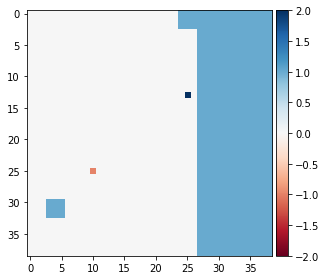

In [120]:
from pathlib import Path
import pickle
import numpy as np
from skimage.io import imshow
import random
import math

in_file = Path("data")/'gen_1530'

dat = None;
with open(in_file,'rb') as f:
    dat = pickle.load(f);

idx = random.randrange(len(dat))
# idx = 88
im = np.array(dat[idx][0][1]['collision_grid']);
print(idx)

bounds = dat[idx][0][1]['grid_bounds'];

def index_from_pos(pos):
    position_parameter = ((pos[0]-bounds[0])/(bounds[1]-bounds[0]),(pos[1]-bounds[2])/(bounds[3]-bounds[2]));
    closest_pixel = [int(position_parameter[i]*im.shape[i]) for i in [0,1]];
    return closest_pixel;

start = dat[idx][0][0]['pos'];
start_idx = index_from_pos(start);
im[start_idx[0],start_idx[1]] = 2;

end = dat[idx][0][0]['task_position'];
end_idx = index_from_pos(end);
im[end_idx[0],end_idx[1]] = -1;


def f_x_grad(x,y,p1,p2):
  d1 = (x - p1[0])/max(0.1,dist(x,y,p1));
  d2 = (x - p2[0])/max(0.1,dist(x,y,p2));
  return d1-d2;

def f_y_grad(x,y,p1,p2):
  d1 = (y-p1[1])/max(0.1,dist(x,y,p1));
  d2 = (y-p2[1])/max(0.1,dist(x,y,p2));
  return d1-d2;

def f_smear(x,y,p1,p2):
  return 1/(dist(x,y,p1)+dist(x,y,p2));

def dist(x,y,p):
  return math.sqrt((x-p[0])**2 + (y-p[1])**2)

size = im.shape;
x_grad = np.array([[f_x_grad(x,y,start_idx,end_idx) for x in range(size[0])] for y in range(size[1])]);
y_grad = np.array([[f_y_grad(x,y,start_idx,end_idx) for x in range(size[0])] for y in range(size[1])]);
smear = np.array([[f_smear(x,y,start_idx,end_idx) for x in range(size[0])] for y in range(size[1])]);

print(bounds);

print(im.shape)
imshow(im);


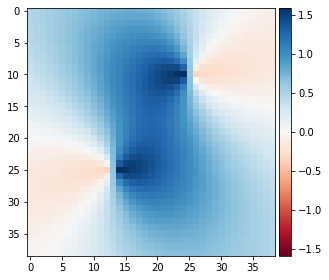

In [121]:
imshow(x_grad);

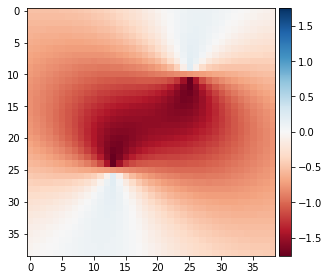

In [122]:
imshow(y_grad);

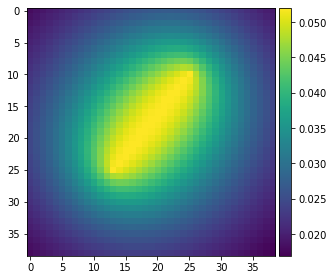

In [123]:
imshow(smear);

(36, 36)


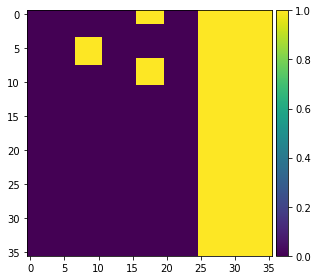

In [96]:
im = np.array(dat[idx][0][0]['collision_grid']);
print(im.shape)
imshow(im)